**За это задание можно получить максимум 25 баллов: это означает, что вы можете делать те задачи, которые вам нравятся, и к чему у вас больше лежит душа.**

In [4]:
import scipy
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from math import *
import imageio
import os

# Простые задачи (8 баллов)

- (2 балла) Нарисуйте вашу любимую функцию в 3d в вашей любимой [цветовой схеме](https://matplotlib.org/users/colormaps.html)

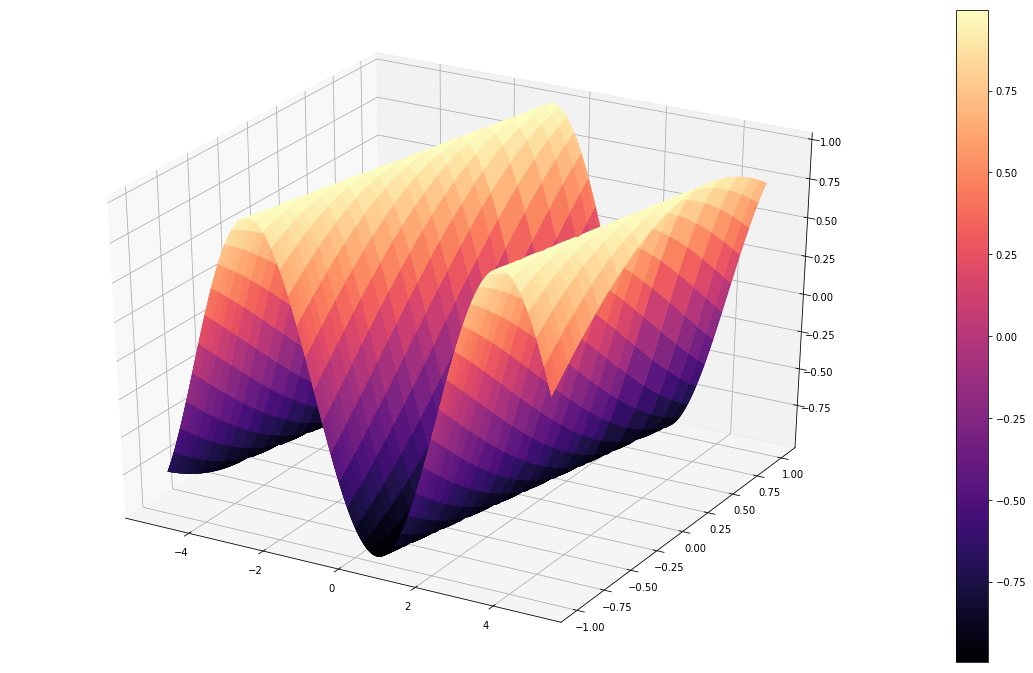

In [46]:

fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')




X = np.arange(-5, 5, 0.01)
Y = np.cos(X)
X, Y = np.meshgrid(X, Y)
Z = np.sin(Y-X)

surf = ax.plot_surface(X, Y, Z, cmap='magma')

fig.colorbar(surf)

plt.show()

- (4 балла) Напишите функцию, которая бы для файла `data/nans.txt` показывала бы значение y от любого x в пределах (-10, -1). Если x не влазит в эти пределы, то вернуть nan. x может быть как вектором так и скаляром. NaN-ы из данных, конечно, надо убрать
    - (2 балла) Написать [docstring](https://numpydoc.readthedocs.io/en/latest/format.html) к этой функции

In [45]:
def some_function(x):
    """Функция принимает аргумент и возвращает 
    
    интерполированное значение дзета-функции Римана
    в данной точке.
    """
    x1, y1 = np.loadtxt('data/nans.txt', unpack = True)
    mask = (~np.isnan(y1))
    yy = y1[mask]
    xx = x1[mask]

    interp = interp1d(xx, yy)

    if x< -10 or x > -1:
        y = nan
    else:
        y = interp(x)
    return y


print(some_function(-1))


-1.0833333333333337


# Продаем разрешение получаем меньше шума  (10 баллов)

-  Один из самых известных и эффективных способов убрать шум с данных это так называемое [скользящее среднее](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F). Вкартце, суть этого метода заключается в том, что в каждая точка в векторе заменяется средним из n соседних точек, где n - размер окна. Таким образом, наше временное/пространственное/спектральное разрешение уменьшается, но при этом уменьшается шум.
    - (6 баллов) Реализуйте функцию, принимающую на вход вектор из данных и размер окна, и возвращающую уже усредненные данные

In [9]:
def sliding_average(y, n=10): 
    
    for i in range (len(y)-(n-1)):
        res = np.array([])
        summ = 0
        for j in range (n):
            summ += y[i+j]
        np.append(res, summ/n)
    # Ваш код
    return res

y = np.arange(-5,5,1)
print(sliding_average(y, n = 2))


[]


# Как курица лапой (15 баллов)
В директории `data/alphabet` лежит куча картинок размера (28,28) с буквами из английского алфавита. Каждая субдиректория называется по имени буквы, в каждой такой субдиректории живут картинки соответствующей буквы и всякий мусор &ndash; какие-то левые txt файлы и картинки. Вам нужно построить то, как люди в среднем рисуют каждую букву.

- (3 баллов) Получить список всех файлов во одной субдиректории

In [7]:
%ls data/alphabet/D -R

data/alphabet/D:
0a2zx2cwqr.png  D-1528.png  D-1701.png  D-1876.png      hhuqajk6jl.txt
0cero6us58.txt  D-1529.png  D-1702.png  D-1877.png      hn5ruid3ei.txt
0gy7muxprn.txt  D-152.png   D-1703.png  D-1878.png      ho691v6dvt.txt
0khqdalbb1.png  D-1530.png  D-1704.png  D-1879.png      hphdlgilgm.txt
0m8puyr0wn.txt  D-1531.png  D-1705.png  D-187.png       hsl9nyld55.txt
0od57p4zxj.png  D-1532.png  D-1706.png  D-1880.png      hujo4eb9a9.txt
0priah0dau.png  D-1533.png  D-1707.png  D-1881.png      huxzxrahgk.txt
0pyuthwiyv.png  D-1534.png  D-1708.png  D-1882.png      hxkm7s6qs1.txt
0t0ycq609f.txt  D-1535.png  D-1709.png  D-1883.png      hy8g2mkm82.txt
0toikk3v9i.txt  D-1536.png  D-170.png   D-1884.png      i6nmwosizw.png
0ufpymmtk1.txt  D-1537.png  D-1710.png  D-1885.png      iaonzzj2bz.png
0y6cyr3554.txt  D-1538.png  D-1711.png  D-1886.png      ih5x7sf6bb.txt
0yemd3ith7.png  D-1539.png  D-1712.png  D-1887.png      il8q5enbz4.txt
13r2m5e6kt.txt  D-153.png   D-1713.png  D-1888.png      ip9s

- (3 баллов) Отсортировать только нужные файлы из этого списка

In [10]:
y = os.listdir('data/alphabet/A')


matching = [s for s in y if "A-" in s] 
matching

['A-1503.png',
 'A-1516.png',
 'A-1950.png',
 'A-1651.png',
 'A-1811.png',
 'A-1898.png',
 'A-1681.png',
 'A-198.png',
 'A-1840.png',
 'A-1942.png',
 'A-1815.png',
 'A-192.png',
 'A-1560.png',
 'A-1787.png',
 'A-1732.png',
 'A-1550.png',
 'A-1902.png',
 'A-1859.png',
 'A-152.png',
 'A-1648.png',
 'A-1537.png',
 'A-1510.png',
 'A-1695.png',
 'A-1918.png',
 'A-195.png',
 'A-1949.png',
 'A-1874.png',
 'A-1535.png',
 'A-1759.png',
 'A-1571.png',
 'A-1919.png',
 'A-155.png',
 'A-1911.png',
 'A-1852.png',
 'A-1923.png',
 'A-1850.png',
 'A-1823.png',
 'A-1583.png',
 'A-1652.png',
 'A-1877.png',
 'A-1809.png',
 'A-1785.png',
 'A-1552.png',
 'A-1526.png',
 'A-1566.png',
 'A-1983.png',
 'A-172.png',
 'A-178.png',
 'A-1556.png',
 'A-1931.png',
 'A-1707.png',
 'A-153.png',
 'A-1579.png',
 'A-1797.png',
 'A-1813.png',
 'A-1814.png',
 'A-1504.png',
 'A-1975.png',
 'A-1796.png',
 'A-1930.png',
 'A-1600.png',
 'A-1861.png',
 'A-1518.png',
 'A-1624.png',
 'A-1669.png',
 'A-1703.png',
 'A-1895.png',
 'A

- (9 баллов) Пройтись по всем субдиректориям, получить и нарисовать среднее изображение для каждой буквы

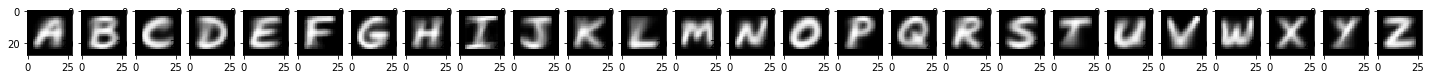

In [32]:
import string

letters = list(string.ascii_uppercase) # подсказочка
pictures = []
result = []
listim = []
#np.asarray(listim)
#np.asarray(pictures)
#np.asarray(result)
for i in letters:
    # Берём нужную букву и ищем в директории по этой букве
    letter = os.listdir('data/alphabet/' + i)
    # Ищём только те файлы которые начинаются с 'A-'
    matching = [s for s in letter if i + "-" in s] 
    # Вот до этого момента все работает, он находит названия файлов и тд
    #print(matching)
    for j in range(len(matching)):
        im = imageio.imread('data/alphabet/' + i + '/' + matching[j])
        listim.append(im)
        #print(listim)
    
    np.asarray(listim)
    pictures.append(np.average(listim, axis = 0))
    listim = []
    matching = []


#plt.imshow(pictures[0])
#plt.plot(pictures[0])
#plt.show()
    
    
    


    
    
    




f, ax = plt.subplots(1, len(letters), figsize=(25,25))
for i in range(len(letters)):
    ax[i].imshow(pictures[i], cmap='Greys_r')
plt.show()

# Ваш код